# Датасеты к задаче выявления новизны

В данном ноутбуке будет описан процесс получения датасета для задачи выявления новизны - датасета, собранного из реальных данных(твиты) и размеченного самостоятельно определенным образом.

## Новые темы обсуждения в твиттере

Из открытых источников были собраны различные датасеты, в которых описаны твиты за различное время, и каждый датасет отличается тематикой от остальных. Тематика при сборе датасетов определялась в основном хештегами в твиттах.

Агрегирующий сайт, с помощью которого можно найти все датасеты:

https://www.trackmyhashtag.com/blog/free-twitter-datasets/

Цель: скачать все датасеты, выделить в них временную метку и текст и затем склеить все датасеты в один большой, сохранить его версию с временными метками и без них.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

### Covid-19

In [3]:
df1 = pd.read_csv('COVID-19/COVID.csv')

In [4]:
df1.head(2)

,Tweet Id,Tweet URL,Tweet Posted Time (UTC),Tweet Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Lat,...,User Id,Name,Screen Name,User Bio,Verified or Non-Verified,Profile URL,Protected or Non-protected,User Followers,User Following,User Account Creation Date
0,"""1233417783175778304""",https://twitter.com/Giussi92/status/1233417783...,28 Feb 2020 15:44:49,Also the entire Swiss Football League is on ho...,Tweet,Twitter for iPhone,0,0,NaN,NaN,...,"""1556856595""",Giuseppe Gentile,Giussi92,NaN,Verified,https://twitter.com/Giussi92,Non-Protected,3071,100,30 Jun 2013 00:27:50
1,"""1233417742520332290""",https://twitter.com/LAMofficial/status/1233417...,28 Feb 2020 15:44:40,World Health Org Official: Trump’s press confe...,Tweet,Twitter Web App,0,0,Los Angeles CA USA,NaN,...,"""113738369""",London After Midnight,LAMofficial,London After Midnight is a music project by wr...,Verified,https://twitter.com/LAMofficial,Non-Protected,4189,84,12 Feb 2010 21:43:17


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60160 entries, 0 to 60159
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Tweet Id                    60160 non-null  object 
 1   Tweet URL                   60160 non-null  object 
 2   Tweet Posted Time (UTC)     60160 non-null  object 
 3   Tweet Content               60160 non-null  object 
 4   Tweet Type                  60160 non-null  object 
 5   Client                      60160 non-null  object 
 6   Retweets Received           60160 non-null  int64  
 7   Likes Received              60160 non-null  int64  
 8   Tweet Location              40620 non-null  object 
 9   Lat                         19 non-null     float64
 10  Long                        19 non-null     float64
 11  Tweet Language              59012 non-null  object 
 12  User Id                     60160 non-null  object 
 13  Name                        601

In [6]:
df1 = df1[['Tweet Posted Time (UTC)', 'Tweet Content']]
df1.columns = ['time', 'content']

In [7]:
df1['time'] = pd.to_datetime(df1['time'], utc=True)

In [8]:
df1.head(2)

,time,content
0,2020-02-28 15:44:49+00:00,Also the entire Swiss Football League is on ho...
1,2020-02-28 15:44:40+00:00,World Health Org Official: Trump’s press confe...


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60160 entries, 0 to 60159
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   time     60160 non-null  datetime64[ns, UTC]
 1   content  60160 non-null  object             
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 940.1+ KB


### Russian troll tweets

Несколько .csv файлов с твитами российских "тролей"

In [10]:
df2 = pd.read_csv('russian-troll-tweets/1.csv')
df2.head(2)

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,...,Right,0,RightTroll,0,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
1,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,...,Right,0,RightTroll,0,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN


In [11]:
def append(df1, df2):
    if df1.size == 0:
        return df2
    return pd.concat( [df1, df2] )

In [12]:
df2 = pd.DataFrame()

In [13]:
dataset_dir = './russian-troll-tweets'
for i, filename in enumerate( os.listdir(dataset_dir) ):
    if filename[-3:] != 'csv':
        continue
    tmp = pd.read_csv('/'.join( (dataset_dir, filename) ))
    tmp = tmp[['publish_date', 'content']]
    tmp.columns = ['time', 'content']
    df2 = append(df2, tmp)
    break

In [14]:
df2.head(2)

,time,content
0,9/23/2016 17:08,Bosh situation hasn't changed since Feb. Heat ...
1,9/23/2016 17:08,Youre an IDIOT! Now you say 99% when before yo...


In [15]:
df2['time'] = pd.to_datetime( df2['time'], utc=True )

In [16]:
df2.head(2)

,time,content
0,2016-09-23 17:08:00+00:00,Bosh situation hasn't changed since Feb. Heat ...
1,2016-09-23 17:08:00+00:00,Youre an IDIOT! Now you say 99% when before yo...


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258051 entries, 0 to 258050
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype              
---  ------   --------------   -----              
 0   time     258051 non-null  datetime64[ns, UTC]
 1   content  258050 non-null  object             
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 3.9+ MB


### Apple Sentiment Tweets

In [18]:
base_dir = './apple-sentiment'
df3 = pd.read_csv('/'.join((base_dir, 'data.csv')), encoding="ISO-8859-1")

In [19]:
df3.head(2)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...


In [20]:
df3 = df3[['date', 'text']]
df3.columns = ['time', 'content']

In [21]:
df3['time'] = pd.to_datetime(df3['time'])

In [22]:
df3.head(2)

,time,content
0,2014-12-01 19:30:03+00:00,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,2014-12-01 19:43:51+00:00,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...


In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   time     3886 non-null   datetime64[ns, UTC]
 1   content  3886 non-null   object             
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 60.8+ KB


### US elections

In [24]:
df4 = pd.DataFrame()
dataset_dir = "./us elections 2020"

In [25]:
pd.read_csv('/'.join((dataset_dir, "AndrewYang.csv"))).head(2)

,Tweet Id,Text,Name,Screen Name,Created At,Favorites,Retweets,Language,Client,Tweet Type,Media Type,URLs,Hashtags,Mentions
0,1096442292527874048,Deaths now outnumber births among white people...,Andrew Yang,AndrewYang,Fri Feb 15 16:13:08 +0000 2019,2215,816,English,"<a href=""https://coschedule.com"" rel=""nofollow...",Tweet,NaN,1,0,0
1,1096446574656393217,@pfrench99 Thanks Peter! 👍,Andrew Yang,AndrewYang,Fri Feb 15 16:30:09 +0000 2019,5,0,English,"<a href=""http://twitter.com/download/iphone"" r...",Reply,NaN,0,0,1


In [26]:
for filename in os.listdir(dataset_dir):
    if filename[-3:] != 'csv':
        continue
    tmp = pd.read_csv('/'.join((dataset_dir, filename)))
    tmp = tmp[['Created At', 'Text']]
    tmp.columns = ['time', 'content']
    df4 = append(df4, tmp)

In [27]:
df4['time'] = pd.to_datetime(df4['time'])

In [28]:
df4.head(2)

,time,content
0,2016-04-12 01:22:16+00:00,"I posted 2 photos on Facebook in the album ""Mi..."
1,2016-04-12 01:22:17+00:00,"I posted 3 photos on Facebook in the album ""Mi..."


In [29]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77329 entries, 0 to 3199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   time     77329 non-null  datetime64[ns, UTC]
 1   content  77329 non-null  object             
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 1.8+ MB


### Объединяем

"Нормальными" твитами будем сначала считать последовательность твитов одной из групп. Начиная с некоторого момента времени, посреди твитов этой группы начнут появляться твиты другой группы. Будем помечать их как аномальные - это и будет новизна в данных. Начиная с некоторого порога появления этих "новых" данных, будем уже считать твиты этой группы "нормальными" и помечать их соответствующе. Таким же образом будем вводить твиты оставшихся групп. Так, получим размеченный датасет в виде временного ряда, который можно будет использовать для обучения и/или проверки предсказания.

In [30]:
[min(df1['time']), min(df2['time']), min(df3['time']), min(df4['time'])]

[Timestamp('2019-12-01 03:17:00+0000', tz='UTC'),
 Timestamp('2012-02-02 00:35:00+0000', tz='UTC'),
 Timestamp('2014-12-01 19:30:03+0000', tz='UTC'),
 Timestamp('2007-10-24 22:45:57+0000', tz='UTC')]

In [31]:
[max(df1['time']), max(df2['time']), max(df3['time']), max(df4['time'])]

[Timestamp('2020-02-28 15:44:49+0000', tz='UTC'),
 Timestamp('2018-05-18 23:49:00+0000', tz='UTC'),
 Timestamp('2014-12-10 00:48:10+0000', tz='UTC'),
 Timestamp('2019-06-28 11:21:52+0000', tz='UTC')]

Будем считать, что изначально нормальный класс у нас - это 4 группа твитов, там не будет новизны. 

В качестве новизны будем считать первые 5%(в порядке публикации твитов) каждого датасета из оставшихся.

In [52]:
df4['novel'] = np.zeros( df4.shape[0], dtype=float )
df4['type'] = np.array( [4] * df4.shape[0], dtype=int )

In [53]:
df1.sort_values( by='time', inplace=True )
df1['novel'] = np.array([1] * int( df1.shape[0] * 0.05 ) + [0] * (df1.shape[0] - int(df1.shape[0] * 0.05)),
                        dtype=float)
df1['type'] = np.array( [1] * df1.shape[0], dtype=int )

In [54]:
df2.sort_values( by='time', inplace=True )
df2['novel'] = np.array([1] * int( df2.shape[0] * 0.05 ) + [0] * (df2.shape[0] - int(df2.shape[0] * 0.05)),
                        dtype=float)
df2['type'] = np.array( [2] * df2.shape[0], dtype=int )

In [55]:
df3.sort_values( by='time', inplace=True )
df3['novel'] = np.array([1] * int( df3.shape[0] * 0.05 ) + [0] * (df3.shape[0] - int(df3.shape[0] * 0.05)),
                        dtype=float)
df3['type'] = np.array( [3] * df3.shape[0], dtype=int )

In [56]:
df = pd.concat([df4, df1, df2, df3])

In [57]:
df.sort_values(by='time', inplace=True)

In [58]:
df.head()

,time,content,novel,type
0,2007-10-24 22:45:57+00:00,Tune in 11:30 ET tomorrow for a live webcast o...,0.0,4
1,2007-12-29 15:35:26+00:00,"Iowans, there's a good chance there's a Biden ...",0.0,4
0,2009-06-10 00:04:48+00:00,Met with Judge Sotomayor today. Very impressiv...,0.0,4
1,2009-06-12 21:28:47+00:00,"PHOTOS: On June 12, Michael Bennet met with me...",0.0,4
2,2009-06-15 20:44:18+00:00,PHOTOS: Women for Bennet held a fundraiser for...,0.0,4


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399426 entries, 0 to 0
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype              
---  ------   --------------   -----              
 0   time     399426 non-null  datetime64[ns, UTC]
 1   content  399425 non-null  object             
 2   novel    399426 non-null  float64            
 3   type     399426 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(1)
memory usage: 15.2+ MB


In [60]:
df.describe()

,novel,type
count,399426.000000,399426.000000
mean,0.040318,2.246313
std,0.196704,0.934922
min,0.000000,1.000000
25%,0.000000,2.000000
50%,0.000000,2.000000
75%,0.000000,2.000000
max,1.000000,4.000000


In [46]:
df.to_csv('twitter_dataset.csv')

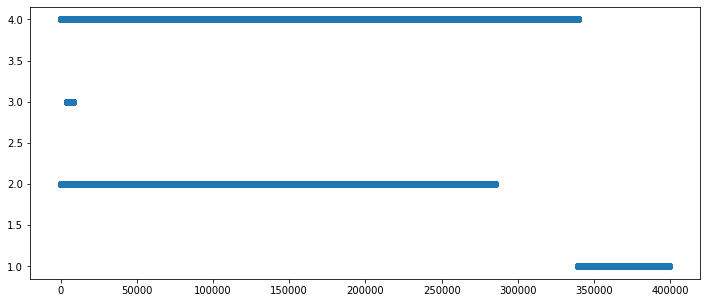

In [63]:
plt.figure(figsize=(12,5))
target = df['type'].tolist()
plt.scatter(np.arange(len(target)), target)